In [101]:
import math
import random
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt

In [102]:
# 逆関数法
def inv_func_method(F_inv):
    u = random.random()
    return F_inv(u)

def draw_result(val_list, title=None, tick_ind=False):
    # list の値を切り捨て、それぞれの値の出現回数をカウント
    val_list = np.array(val_list)
    nums = np.floor(val_list).astype(int)
    count_d = dict(Counter(nums))
    
    # 出現回数に基づいてグラフを描画
    keys = list(count_d.keys())
    values = list(count_d.values())

    fig, ax = plt.subplots(figsize=(6, 4))

    ax.bar(keys, values, color='skyblue', edgecolor='black')
    if title is None:
        title = "Frequency of Values"
    ax.set_title(title, fontsize=14)
    ax.set_xlabel("Values", fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    if tick_ind:
        ax.set_xticks(keys)
        ax.set_xticklabels([str(k) for k in keys], fontsize=10)
    ax.tick_params(axis='both', labelsize=10)

    plt.show()
    

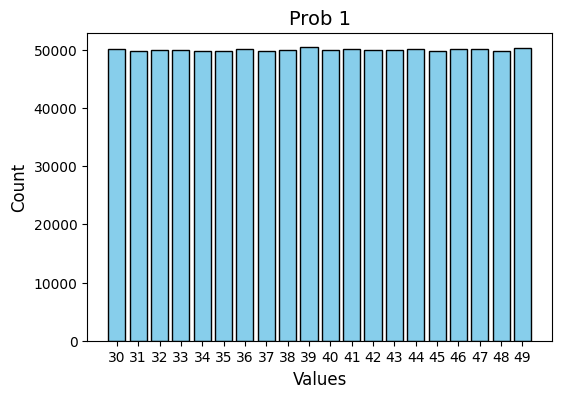

In [103]:
# Prob 1: 最小値30, 最大値50 の一様分布

def f(x, a, b):
    if x < a:
        return 0
    elif a < x <= b:
        return 1 / (b - a)
    else:
        return 0

def F(x, a, b):
    if x < a:
        return 0
    elif a < x <= b:
        return x - a / (b - a)
    else:
        return 1

def F_inv(u, a, b):
    if u < 0:
        raise ValueError
    elif 0 < u <= 1:
        return (b - a) * u + a
    else:
        raise ValueError
    
a = 30
b = 50
    
val_list = []
for _ in range(1000000):
    rand_val = inv_func_method(lambda u: F_inv(u, a, b))
    val_list.append(rand_val)
    
draw_result(val_list, title="Prob 1", tick_ind=True)
    

    

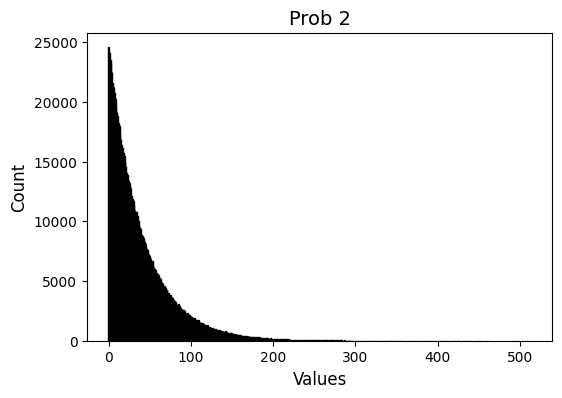

In [104]:
# Prob 2: 平均40 の指数分布

def f(x, lmd):
    if x < 0:
        return 0
    else:
        return lmd * math.exp(-lmd * x)

def F(x, lmd):
    if x < 0:
        return 0
    else:
        return 1 - math.exp(-lmd * x)

def F_inv(u, lmd):
    if u < 0:
        raise ValueError
    elif 0 < u <= 1:
        return -1 / lmd * math.log(1 - u)
    else:
        raise ValueError
    
val_list = []

mu = 40
lmd = 1 / mu

for _ in range(1000000):
    rand_val = inv_func_method(lambda u: F_inv(u, lmd))
    val_list.append(rand_val)
    
draw_result(val_list, title="Prob 2", tick_ind=False)
